# Lab 2 Sample Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x):
    """Sigmoid function.
    This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
    """
    return 1 / (1 + np.exp(-x))


def der_sigmoid(y):
    """First derivative of Sigmoid function.
    The input to this function should be the value that output from sigmoid function.
    """
    return y * (1 - y)


class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """Data generation (Linear)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, (x > y).astype(np.int64).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_chessboard(n=100):
        """Data generation (Chessboard)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, ((x < 0.25) ^ (x > 0.5) ^ (x > 0.75) ^ (y < 0.25) ^ (y > 0.5) ^ (y > 0.75)).astype(np.int64).reshape(
            (-1, 1)
        )

    @staticmethod
    def fetch_data(mode, n):
        """Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == "Linear" or mode == "XOR" or mode == "Chessboard"

        data_gen_func = {"Linear": GenData._gen_linear, "XOR": GenData._gen_xor, "Chessboard": GenData._gen_chessboard}[mode]

        return data_gen_func(n)


class SimpleNet:
    def __init__(self, num_step=6000, print_interval=100, learning_rate=(1e-2)*5, decay_rate=0.95):
        self.num_step = num_step
        self.print_interval = print_interval
        self.learning_rate = learning_rate
        # Learning rate schedules
        # self.decay_rate = decay_rate

        input_dim = 2
        hidden1_dim = 100
        hidden2_dim = 50
        hidden3_dim = 10
        output_dim = 1

        self.hidden1_weights = np.random.randn(input_dim, hidden1_dim)
        self.hidden1_bias = np.zeros((1, hidden1_dim))
        self.hidden2_weights = np.random.randn(hidden1_dim, hidden2_dim)
        self.hidden2_bias = np.zeros((1, hidden2_dim))
        self.hidden3_weights = np.random.randn(hidden2_dim, hidden3_dim)
        self.hidden3_bias = np.zeros((1, hidden3_dim))
        self.output_weights = np.random.randn(hidden3_dim, output_dim)
        self.output_bias = np.zeros((1, output_dim))

        # Adaptive learning rate methods: AdaGrad
        # self.acc_hidden1_weights = np.ones_like(self.hidden1_weights)
        # self.acc_hidden1_bias = np.ones_like(self.hidden1_bias)
        # self.acc_hidden2_weights = np.ones_like(self.hidden2_weights)
        # self.acc_hidden2_bias = np.ones_like(self.hidden2_bias)
        # self.acc_hidden3_weights = np.ones_like(self.hidden3_weights)
        # self.acc_hidden3_bias = np.ones_like(self.hidden3_bias)
        # self.acc_output_weights = np.ones_like(self.output_weights)
        # self.acc_output_bias = np.ones_like(self.output_bias)

    @staticmethod
    def plot_result(data, gt_y, pred_y):
        """Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            gt_y:   ground truth to the data
            pred_y: predicted results to the data
        """
        assert data.shape[0] == gt_y.shape[0] == pred_y.shape[0], f"{data.shape}, {gt_y.shape}, {pred_y.shape}"

        plt.figure(figsize=(11, 5))

        plt.subplot(121)
        plt.title("Ground Truth", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=gt_y[:,0], cmap=plt.cm.bwr)

        plt.subplot(122)
        plt.title("Prediction", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=pred_y[:,0], cmap=plt.cm.bwr)

        plt.show()

    def forward(self, inputs):
        self.inputs = inputs

        hidden1_output = sigmoid(np.dot(inputs, self.hidden1_weights) + self.hidden1_bias)
        hidden2_output = sigmoid(np.dot(hidden1_output, self.hidden2_weights) + self.hidden2_bias)
        hidden3_output = sigmoid(np.dot(hidden2_output, self.hidden3_weights) + self.hidden3_bias)
        self.hidden1_output = hidden1_output
        self.hidden2_output = hidden2_output
        self.hidden3_output = hidden3_output

        output = sigmoid(np.dot(hidden3_output, self.output_weights) + self.output_bias)
        self.output = output

        return output

    def backward(self):
        delta_output = self.error * der_sigmoid(self.output)
        d_output_weights = np.dot(self.hidden3_output.T, delta_output)

        delta_hidden3 = np.dot(delta_output, self.output_weights.T) * der_sigmoid(self.hidden3_output)
        d_hidden3_weights = np.dot(self.hidden2_output.T, delta_hidden3)

        delta_hidden2 = np.dot(delta_hidden3, self.hidden3_weights.T) * der_sigmoid(self.hidden2_output)
        d_hidden2_weights = np.dot(self.hidden1_output.T, delta_hidden2)

        delta_hidden1 = np.dot(delta_hidden2, self.hidden2_weights.T) * der_sigmoid(self.hidden1_output)
        d_hidden1_weights = np.dot(self.inputs.T, delta_hidden1)

        self.output_weights -= self.learning_rate * d_output_weights
        self.output_bias -= self.learning_rate * delta_output
        self.hidden3_weights -= self.learning_rate * d_hidden3_weights
        self.hidden3_bias -= self.learning_rate * delta_hidden3
        self.hidden2_weights -= self.learning_rate * d_hidden2_weights
        self.hidden2_bias -= self.learning_rate * delta_hidden2
        self.hidden1_weights -= self.learning_rate * d_hidden1_weights
        self.hidden1_bias -= self.learning_rate * delta_hidden1

        # Adaptive learning rate methods: AdaGrad
        # self.acc_output_weights += d_output_weights ** 2
        # self.acc_output_bias += delta_output ** 2
        # self.output_weights -= self.learning_rate * d_output_weights / (np.sqrt(self.acc_output_weights) + 1e-8)
        # self.output_bias -= self.learning_rate * delta_output / (np.sqrt(self.acc_output_bias) + 1e-8)

        # self.acc_hidden3_weights += d_hidden3_weights ** 2
        # self.acc_hidden3_bias += delta_hidden3 ** 2
        # self.hidden3_weights -= self.learning_rate * d_hidden3_weights / (np.sqrt(self.acc_hidden3_weights) + 1e-8)
        # self.hidden3_bias -= self.learning_rate * delta_hidden3 / (np.sqrt(self.acc_hidden3_bias) + 1e-8)

        # self.acc_hidden2_weights += d_hidden2_weights ** 2
        # self.acc_hidden2_bias += delta_hidden2 ** 2
        # self.hidden2_weights -= self.learning_rate * d_hidden2_weights / (np.sqrt(self.acc_hidden2_weights) + 1e-8)
        # self.hidden2_bias -= self.learning_rate * delta_hidden2 / (np.sqrt(self.acc_hidden2_bias) + 1e-8)

        # self.acc_hidden1_weights += d_hidden1_weights ** 2
        # self.acc_hidden1_bias += delta_hidden1 ** 2
        # self.hidden1_weights -= self.learning_rate * d_hidden1_weights / (np.sqrt(self.acc_hidden1_weights) + 1e-8)
        # self.hidden1_bias -= self.learning_rate * delta_hidden1 / (np.sqrt(self.acc_hidden1_bias) + 1e-8)

    def train(self, inputs, labels):
        # make sure that the amount of data and label is match
        assert inputs.shape[0] == labels.shape[0]

        n = inputs.shape[0]

        for epoch in range(self.num_step):
            total_loss = 0

            for idx in range(n):
                self.output = self.forward(inputs[idx : idx + 1, :])
                self.error = self.output - labels[idx : idx + 1, :]
                loss = 0.5 * np.square(self.error).sum()
                total_loss += loss
                self.backward()

            if epoch % self.print_interval == 0:
                average_loss = total_loss / n
                print(f"Epoch {epoch}: Average Loss = {average_loss}")
                self.test(inputs, labels)

            # Learning rate schedules
            # if (epoch+1) % 1000 == 0:
            #     self.learning_rate *= self.decay_rate
            #     print(f"Epoch {epoch+1}: updated learning rate: {self.learning_rate}")

        print("Training finished")
        self.test(inputs, labels)

    def test(self, inputs, labels):
        """The testing routine that run forward pass and report the accuracy.

        Args:
            inputs: the testing data. One or several data samples are both okay.
                The shape is expected to be [BatchSize, 2].
            labels: the ground truth correspond to the inputs.
        """
        n = inputs.shape[0]

        error = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx : idx + 1, :])
            error += abs(result - labels[idx : idx + 1, :])

        error /= n

        """ Print or plot your results in your preferred forms"""
        print("accuracy: %.2f" % ((1 - error) * 100) + "%")

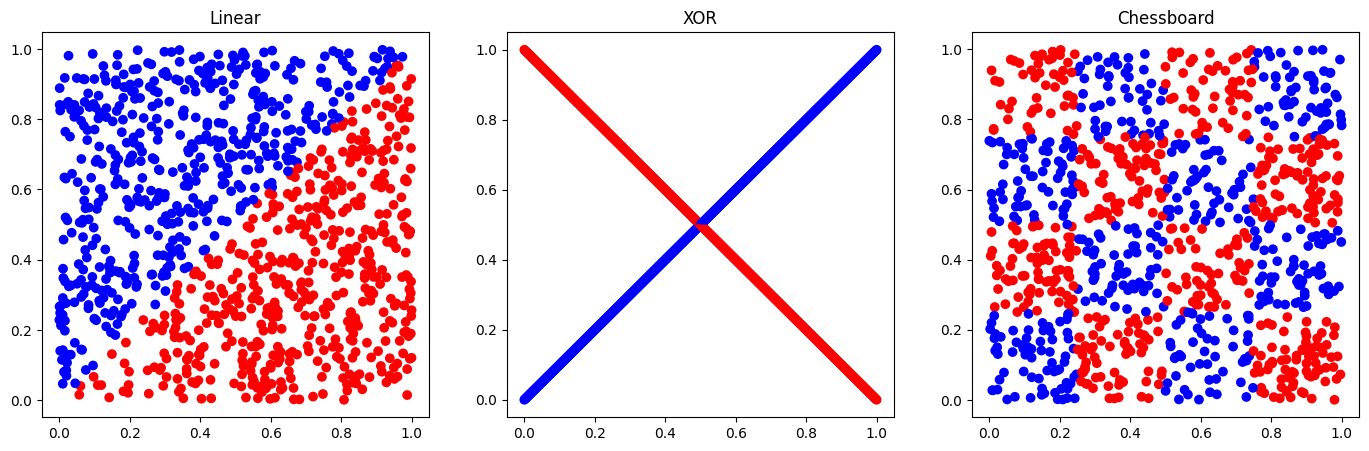

In [ ]:
plt.figure(figsize=(17, 5))
for i, name in enumerate(['Linear', 'XOR', 'Chessboard']):
    data, label = GenData.fetch_data(name, 1000)
    plt.subplot(1,3,i+1)
    plt.scatter(data[:, 0], data[:, 1], c=label[:, 0], cmap=plt.cm.bwr)
    plt.title(name)

### Run "Linear"

Epoch 0: Average Loss = 0.1077113076979515
accuracy: 57.80%
Epoch 100: Average Loss = 0.006362496761241432
accuracy: 95.94%
Epoch 200: Average Loss = 0.004514964371596096
accuracy: 96.34%
Epoch 300: Average Loss = 0.0036951544168111233
accuracy: 96.74%
Epoch 400: Average Loss = 0.002961372218042209
accuracy: 96.79%
Epoch 500: Average Loss = 0.002693089070821773
accuracy: 97.04%
Epoch 600: Average Loss = 0.0025446432896296524
accuracy: 97.30%
Epoch 700: Average Loss = 0.002486504377117528
accuracy: 97.39%
Epoch 800: Average Loss = 0.0029607404050722703
accuracy: 97.29%
Epoch 900: Average Loss = 0.0019177632674487162
accuracy: 98.95%
Epoch 1000: Average Loss = 0.001740297523654304
accuracy: 99.11%
Epoch 1100: Average Loss = 0.0016256676985828532
accuracy: 99.20%
Epoch 1200: Average Loss = 0.0015757547801166798
accuracy: 99.28%
Epoch 1300: Average Loss = 0.0015877152933713866
accuracy: 99.32%
Epoch 1400: Average Loss = 0.004147212140974785
accuracy: 99.37%
Epoch 1500: Average Loss = 0.003

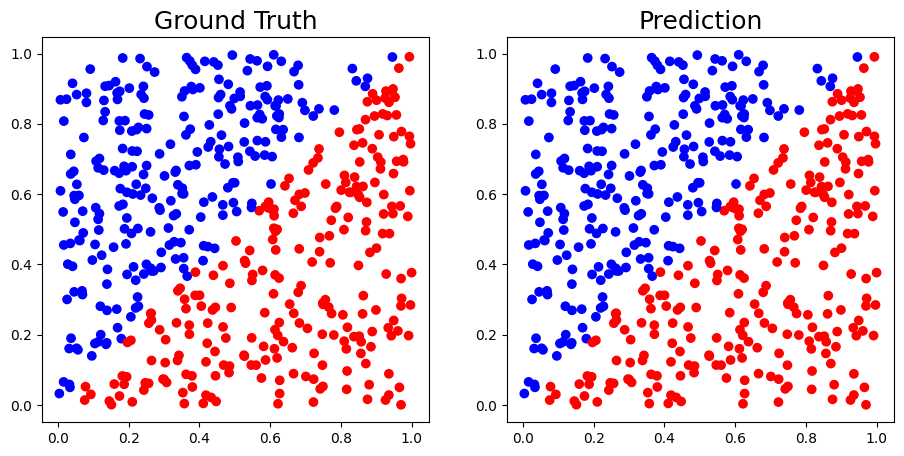

In [ ]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Linear", 500)

net = SimpleNet(5000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

增加自適應學習率AdaGrad的訓練過程

Epoch 0: Average Loss = 0.0897328060126812
accuracy: 63.92%
Epoch 100: Average Loss = 0.006123025167720144
accuracy: 95.20%
Epoch 200: Average Loss = 0.004333712774231842
accuracy: 96.61%
Epoch 300: Average Loss = 0.0035687520566176946
accuracy: 97.22%
Epoch 400: Average Loss = 0.0031188179361817257
accuracy: 97.58%
Epoch 500: Average Loss = 0.002812634983440045
accuracy: 97.82%
Epoch 600: Average Loss = 0.002584894302027315
accuracy: 98.00%
Epoch 700: Average Loss = 0.002404922987488749
accuracy: 98.14%
Epoch 800: Average Loss = 0.002256433933945855
accuracy: 98.26%
Epoch 900: Average Loss = 0.0021299420922212945
accuracy: 98.36%
Epoch 1000: Average Loss = 0.002019541741710925
accuracy: 98.44%
Epoch 1100: Average Loss = 0.0019214040454550087
accuracy: 98.52%
Epoch 1200: Average Loss = 0.0018329878378742887
accuracy: 98.58%
Epoch 1300: Average Loss = 0.0017525767529826075
accuracy: 98.64%
Epoch 1400: Average Loss = 0.0016789885634717725
accuracy: 98.70%
Epoch 1500: Average Loss = 0.001

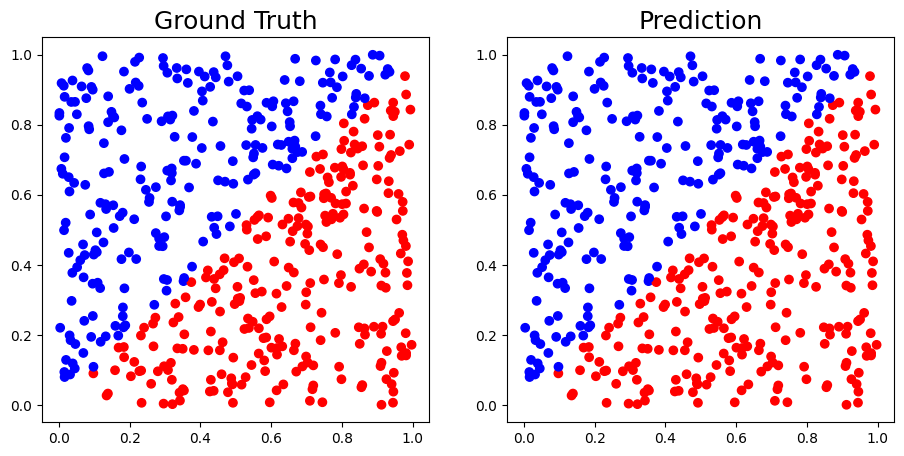

In [2]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Linear", 500)

net = SimpleNet(5000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

一般模型架構的Learning rate初始化為0.065，並且每1000個epoch將learning rate乘以0.95

Epoch 0: Average Loss = 0.06870934491298873
accuracy: 87.43%
Epoch 100: Average Loss = 0.0035190923960323984
accuracy: 98.71%
Epoch 200: Average Loss = 0.002744846390486002
accuracy: 98.89%
Epoch 300: Average Loss = 1.1617205599980767e-05
accuracy: 99.74%
Epoch 400: Average Loss = 4.605536511828856e-06
accuracy: 99.83%
Epoch 500: Average Loss = 2.9762103552186835e-06
accuracy: 99.86%
Epoch 600: Average Loss = 2.209229670848009e-06
accuracy: 99.88%
Epoch 700: Average Loss = 1.7592054690614839e-06
accuracy: 99.90%
Epoch 800: Average Loss = 1.4623736370342146e-06
accuracy: 99.91%
Epoch 900: Average Loss = 1.251573504052351e-06
accuracy: 99.91%
Epoch 1000: updated learning rate: 0.6174999999999999
Epoch 1000: Average Loss = 1.0920109214847095e-06
accuracy: 99.92%
Epoch 1100: Average Loss = 9.754344970691275e-07
accuracy: 99.92%
Epoch 1200: Average Loss = 8.815694995348489e-07
accuracy: 99.93%
Epoch 1300: Average Loss = 8.041496353586385e-07
accuracy: 99.93%
Epoch 1400: Average Loss = 7.391

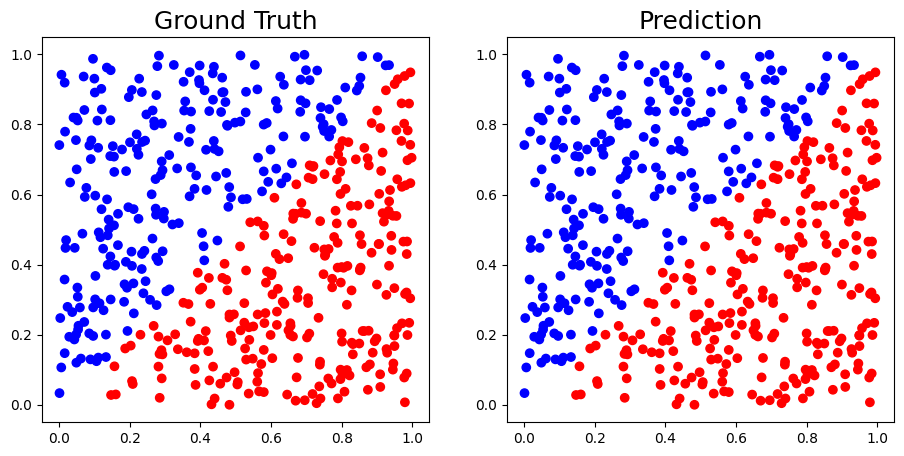

In [2]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Linear", 500)

net = SimpleNet(5000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

### Run "XOR"

Epoch 0: Average Loss = 0.11765313524080961
accuracy: 52.33%
Epoch 100: Average Loss = 0.00992265641982036
accuracy: 91.28%
Epoch 200: Average Loss = 0.00684080446927757
accuracy: 94.18%
Epoch 300: Average Loss = 0.005562597439289178
accuracy: 95.38%
Epoch 400: Average Loss = 0.004811517170883944
accuracy: 96.08%
Epoch 500: Average Loss = 0.004313890306097956
accuracy: 96.56%
Epoch 600: Average Loss = 0.0040056726754788205
accuracy: 96.90%
Epoch 700: Average Loss = 0.0037657950058623386
accuracy: 97.16%
Epoch 800: Average Loss = 0.003526678427446357
accuracy: 97.36%
Epoch 900: Average Loss = 0.003396667395650136
accuracy: 97.54%
Epoch 1000: Average Loss = 0.003313831680750567
accuracy: 97.66%
Epoch 1100: Average Loss = 0.003247538146628715
accuracy: 97.75%
Epoch 1200: Average Loss = 0.0031692326643895192
accuracy: 97.83%
Epoch 1300: Average Loss = 0.003061931715462511
accuracy: 97.92%
Epoch 1400: Average Loss = 0.002945622672770518
accuracy: 98.00%
Epoch 1500: Average Loss = 0.00283135

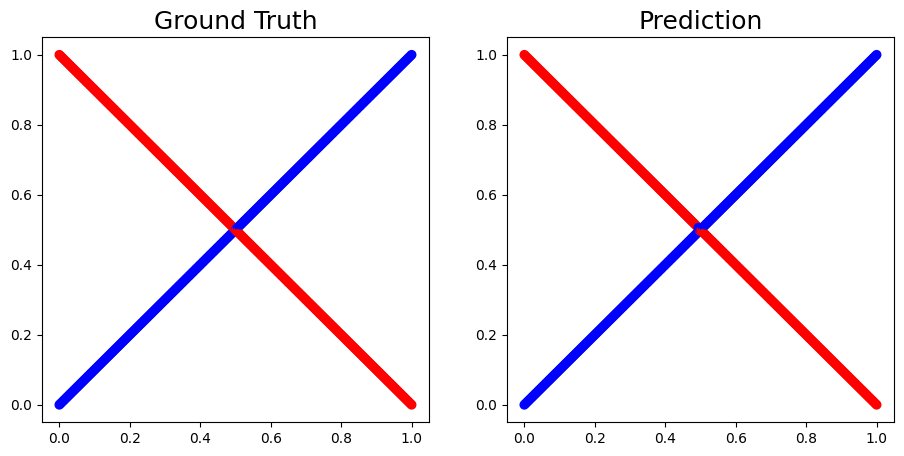

In [ ]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("XOR", 500)

net = SimpleNet(5000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

增加自適應學習率AdaGrad的訓練過程

Epoch 0: Average Loss = 0.1271649930798068
accuracy: 50.60%
Epoch 100: Average Loss = 0.017032685214568802
accuracy: 87.07%
Epoch 200: Average Loss = 0.011789345085992484
accuracy: 90.72%
Epoch 300: Average Loss = 0.009617600459963961
accuracy: 92.33%
Epoch 400: Average Loss = 0.008343949411417041
accuracy: 93.30%
Epoch 500: Average Loss = 0.007475655758945909
accuracy: 93.96%
Epoch 600: Average Loss = 0.006834514145570235
accuracy: 94.45%
Epoch 700: Average Loss = 0.006333907740206661
accuracy: 94.84%
Epoch 800: Average Loss = 0.005930002012004147
accuracy: 95.15%
Epoch 900: Average Loss = 0.00559664346933567
accuracy: 95.41%
Epoch 1000: Average Loss = 0.005314776222106164
accuracy: 95.63%
Epoch 1100: Average Loss = 0.005071539147262367
accuracy: 95.82%
Epoch 1200: Average Loss = 0.0048589369118462854
accuracy: 95.98%
Epoch 1300: Average Loss = 0.004671671358916296
accuracy: 96.13%
Epoch 1400: Average Loss = 0.004505654821816547
accuracy: 96.26%
Epoch 1500: Average Loss = 0.0043574357

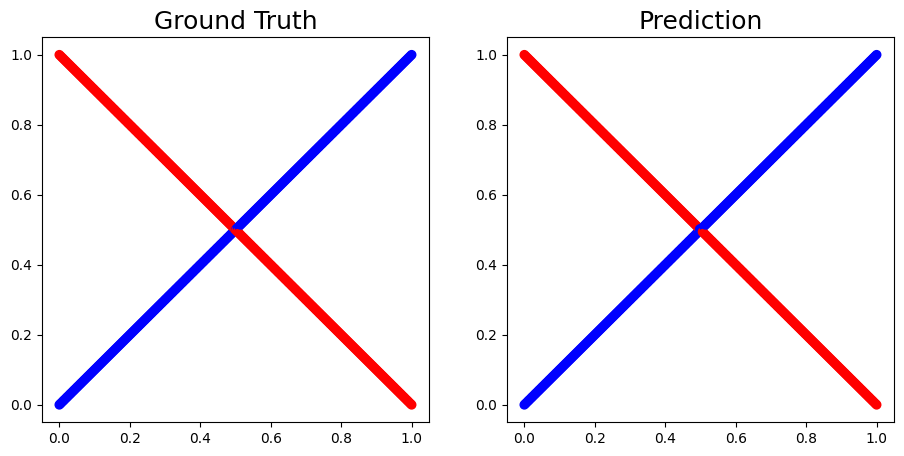

In [5]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("XOR", 500)

net = SimpleNet(5000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

一般模型架構的Learning rate初始化為0.065，並且每1000個epoch將learning rate乘以0.95

Epoch 0: Average Loss = 0.09457361483450646
accuracy: 53.30%
Epoch 100: Average Loss = 0.009593357669046919
accuracy: 85.78%
Epoch 200: Average Loss = 0.025208805222924843
accuracy: 91.97%
Epoch 300: Average Loss = 0.008022865933608545
accuracy: 85.45%
Epoch 400: Average Loss = 0.009031818783444287
accuracy: 91.93%
Epoch 500: Average Loss = 0.006477145659491158
accuracy: 94.66%
Epoch 600: Average Loss = 0.004288647830684706
accuracy: 95.37%
Epoch 700: Average Loss = 0.002803094138748687
accuracy: 97.96%
Epoch 800: Average Loss = 0.0071160813769707764
accuracy: 93.56%
Epoch 900: Average Loss = 0.007941740093222575
accuracy: 96.16%
Epoch 1000: updated learning rate: 0.6174999999999999
Epoch 1000: Average Loss = 0.008586394015478515
accuracy: 97.64%
Epoch 1100: Average Loss = 0.004522173635008996
accuracy: 97.71%
Epoch 1200: Average Loss = 0.01221296800233272
accuracy: 94.76%
Epoch 1300: Average Loss = 0.009364239728486674
accuracy: 96.88%
Epoch 1400: Average Loss = 0.003491948424753294
a

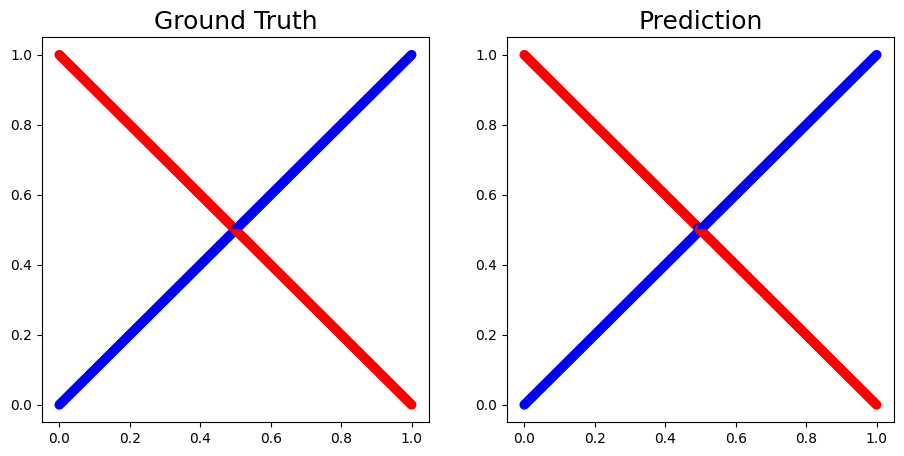

In [3]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("XOR", 500)

net = SimpleNet(5000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

### Run "Chessboard"

Epoch 0: Average Loss = 0.1263117940023771
accuracy: 50.05%
Epoch 100: Average Loss = 0.10393146637739456
accuracy: 56.21%
Epoch 200: Average Loss = 0.06235150965643583
accuracy: 70.63%
Epoch 300: Average Loss = 0.05043952226979098
accuracy: 77.05%
Epoch 400: Average Loss = 0.04261687092486896
accuracy: 80.70%
Epoch 500: Average Loss = 0.03473456942934638
accuracy: 83.48%
Epoch 600: Average Loss = 0.02221686234834266
accuracy: 87.48%
Epoch 700: Average Loss = 0.01895294101169577
accuracy: 89.62%
Epoch 800: Average Loss = 0.015684066700948213
accuracy: 90.42%
Epoch 900: Average Loss = 0.01606173441732172
accuracy: 91.35%
Epoch 1000: Average Loss = 0.013726308799818182
accuracy: 91.27%
Epoch 1100: Average Loss = 0.012664358333115579
accuracy: 91.92%
Epoch 1200: Average Loss = 0.012740987395430768
accuracy: 92.66%
Epoch 1300: Average Loss = 0.013407195099097173
accuracy: 92.11%
Epoch 1400: Average Loss = 0.011200128393113528
accuracy: 90.79%
Epoch 1500: Average Loss = 0.011500436394791614

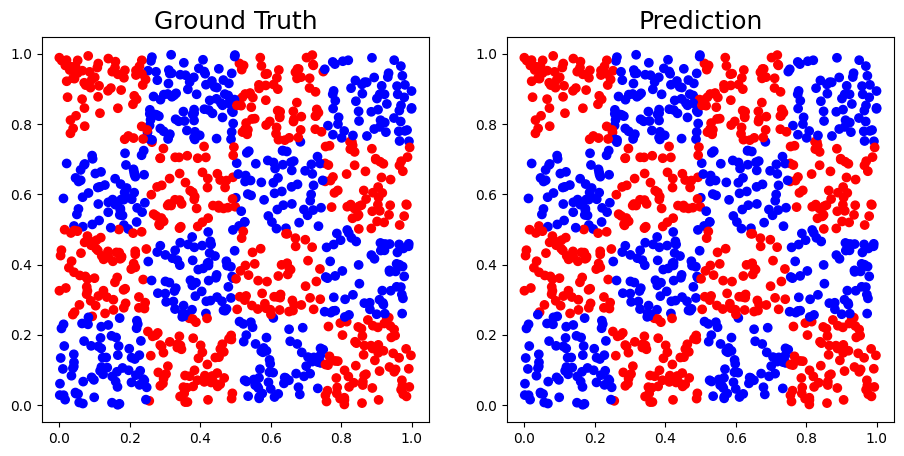

In [2]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Chessboard", 1000)

net = SimpleNet(8000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

增加自適應學習率AdaGrad的訓練過程

Epoch 0: Average Loss = 0.1281616080918537
accuracy: 49.97%
Epoch 100: Average Loss = 0.1219157175155416
accuracy: 51.03%
Epoch 200: Average Loss = 0.11976363323217036
accuracy: 51.68%
Epoch 300: Average Loss = 0.11713153952390135
accuracy: 52.51%
Epoch 400: Average Loss = 0.11458211426757542
accuracy: 53.26%
Epoch 500: Average Loss = 0.1098019789853555
accuracy: 54.36%
Epoch 600: Average Loss = 0.10434458037003659
accuracy: 55.72%
Epoch 700: Average Loss = 0.09802730985163895
accuracy: 57.44%
Epoch 800: Average Loss = 0.09150388235591228
accuracy: 59.42%
Epoch 900: Average Loss = 0.08611311788957862
accuracy: 61.25%
Epoch 1000: Average Loss = 0.08179227477575085
accuracy: 62.90%
Epoch 1100: Average Loss = 0.07854735767942213
accuracy: 64.27%
Epoch 1200: Average Loss = 0.07589499823686015
accuracy: 65.37%
Epoch 1300: Average Loss = 0.07350345824096988
accuracy: 66.29%
Epoch 1400: Average Loss = 0.07116955461770377
accuracy: 67.07%
Epoch 1500: Average Loss = 0.06867010063678189
accuracy

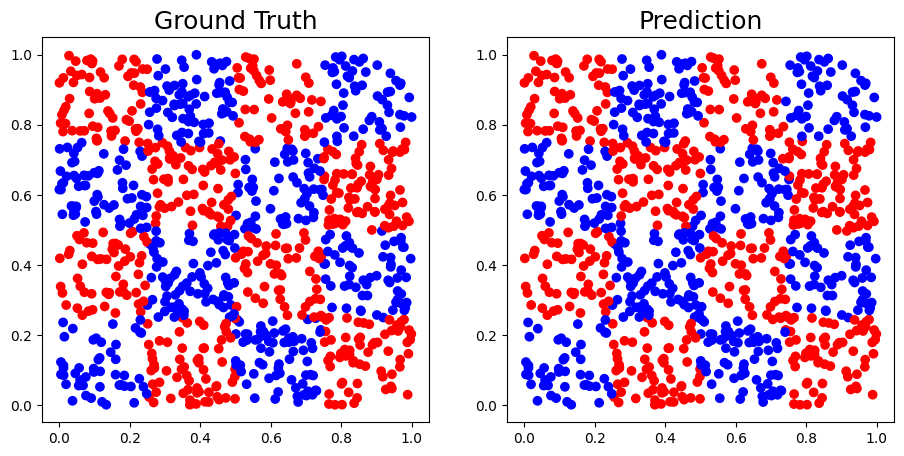

In [4]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Chessboard", 1000)

net = SimpleNet(8000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

一般模型架構的Learning rate初始化為0.065，並且每1000個epoch將learning rate乘以0.95

Epoch 0: Average Loss = 0.13089131069676
accuracy: 50.02%
Epoch 100: Average Loss = 0.08355609361764682
accuracy: 70.36%
Epoch 200: Average Loss = 0.05012698829790721
accuracy: 80.77%
Epoch 300: Average Loss = 0.04230546152857962
accuracy: 83.87%
Epoch 400: Average Loss = 0.04505282305449252
accuracy: 85.16%
Epoch 500: Average Loss = 0.036219767938644724
accuracy: 83.21%
Epoch 600: Average Loss = 0.02477926513437211
accuracy: 87.35%
Epoch 700: Average Loss = 0.025582898025346048
accuracy: 90.55%
Epoch 800: Average Loss = 0.030514446577649974
accuracy: 89.53%
Epoch 900: Average Loss = 0.027216155501679388
accuracy: 89.67%
Epoch 1000: updated learning rate: 0.6174999999999999
Epoch 1000: Average Loss = 0.0282107306094163
accuracy: 90.11%
Epoch 1100: Average Loss = 0.0136197658002881
accuracy: 94.26%
Epoch 1200: Average Loss = 0.011627554048036367
accuracy: 94.59%
Epoch 1300: Average Loss = 0.017564430930302428
accuracy: 93.95%
Epoch 1400: Average Loss = 0.015590218906455667
accuracy: 92.

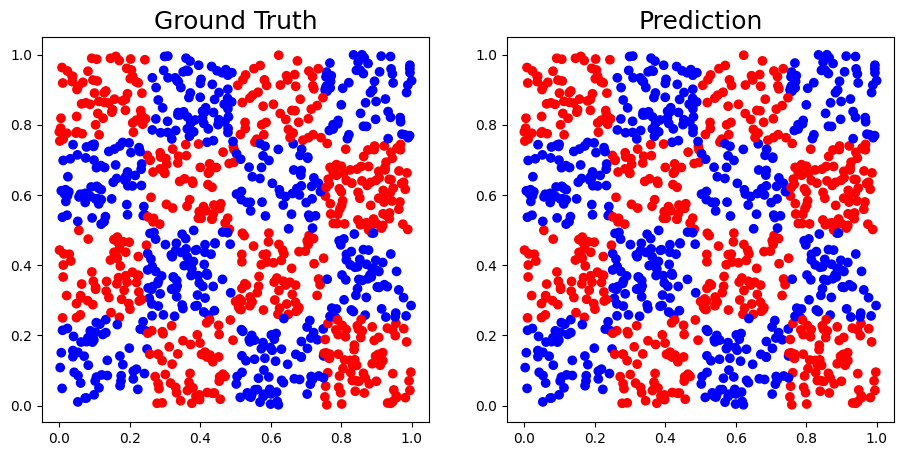

In [5]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Chessboard", 1000)

net = SimpleNet(8000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)